In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#For google colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#Your path
%cd '/content/drive/MyDrive/DL/Project/'


Mounted at /content/drive
/content/drive/MyDrive/DL/Project


In [3]:
#view of a sample of data
df=pd.read_csv("data/A1Benchmark/real_1.csv")
df

,timestamp,value,is_anomaly
0,1,0.000000,0
1,2,0.091758,0
2,3,0.172297,0
3,4,0.226219,0
4,5,0.176358,0
...,...,...,...
1415,1416,0.159675,0
1416,1417,0.137626,0
1417,1418,0.197441,0
1418,1419,0.161966,0


In [4]:
#Convert 0 in value to NaN and drop
df['value'] = df['value'].replace(0, np.nan)
df = df.dropna(subset=['value'])
df.value = preprocessing.normalize([df.value]).T

<ipython-input-4-f679f6d9179a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.value = preprocessing.normalize([df.value]).T


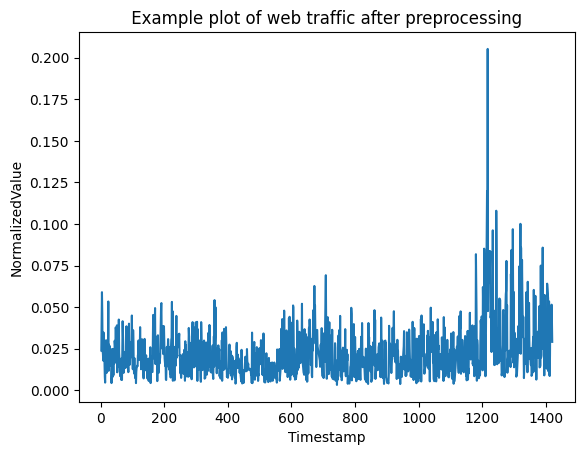

In [5]:
plt.plot(df.timestamp,df.value)
plt.xlabel("Timestamp")
plt.ylabel("NormalizedValue")
plt.title(" Example plot of web traffic after preprocessing ")
plt.show()

In [6]:
#function to convert dataframe to into 2d array
#creating sliding window of length 60 values in a sequence

def convert_2d(df):
    rows = []

    for i in range(len(df) - 59):
        segment = df.iloc[i:i+60]
        is_anomaly = segment['is_anomaly'].any()
        new_row = segment['value'].tolist() + [int(is_anomaly)]
        rows.append(new_row)
    data_frame = pd.DataFrame(rows)

    return data_frame

In [7]:
#test on sample
df2 = convert_2d(df)
df2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.023933,0.044939,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,...,0.023166,0.014312,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0
1,0.044939,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,...,0.014312,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0
2,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,...,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0
3,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,0.016524,...,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.019369,0
4,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,0.016524,0.022919,...,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.019369,0.006319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,0.017441,0.015098,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,...,0.011454,0.013848,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0
1214,0.015098,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,...,0.013848,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0
1215,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,0.019470,...,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0.051497,0
1216,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,0.019470,0.025885,...,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0.051497,0.042245,0


In [8]:
#Import and concat all files
path = r'data/A1Benchmark' #set the path accordingly
all_files=glob.glob(path+"/*.csv")


In [9]:
preprocessed_dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['value'] = df['value'].replace(0, np.nan)
    df = df.dropna(subset=['value'])

    # Normalize the 'value' column
    normalized_values = preprocessing.normalize([df['value'].to_numpy()])[0]
    df['value'] = normalized_values

    preprocessed_dfs.append(df)

concatenated_df = pd.concat(preprocessed_dfs, axis=0, ignore_index=True)

<ipython-input-9-0352ca33db68>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = normalized_values


In [10]:
concatenated_df

,timestamp,value,is_anomaly
0,1,0.117274,0
1,2,0.065254,0
2,3,0.035630,0
3,4,0.069953,0
4,5,0.023508,0
...,...,...,...
92673,1435,0.057625,1
92674,1436,0.061902,1
92675,1437,0.061226,1
92676,1438,0.094766,1


In [11]:
frame = convert_2d(concatenated_df)

In [12]:
frame

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.117274,0.065254,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,...,0.066689,0.038383,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0
1,0.065254,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,...,0.038383,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0
2,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,...,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0
3,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,0.022249,...,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0.048264,0
4,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,0.022249,0.026978,...,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0.048264,0.020991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92614,0.023860,0.021384,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,...,0.022735,0.018908,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,1
92615,0.021384,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,...,0.018908,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,1
92616,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,0.026336,...,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,0.061226,1
92617,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,0.026336,0.024761,...,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,0.061226,0.094766,1


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [14]:
class CLSTM(nn.Module):
    def __init__(self):
        super(CLSTM, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool1d(2, stride=2)
        self.conv2 = nn.Conv1d(64, 64, kernel_size=5, stride=1, padding=2)
        self.lstm = nn.LSTM(input_size=960, hidden_size=64, batch_first=True)
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 2)
        self.tanh = nn.Tanh()
        self.flatten = nn.Flatten()


    def forward(self, x):
        x = self.tanh(self.conv1(x))
        x = self.pool(x)
        x = self.tanh(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1, 960)

        x, _ = self.lstm(x)
        x = self.flatten(x)
        #x = x.contiguous().view(x.size(0), -1)
        x = self.tanh(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x

In [15]:
y = frame.iloc[:, 60]
X = frame.iloc[:, 0:60]

# Train-test split
#no shuffling since we are using sliding window
train_size = int(0.7 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [16]:
#convert to tensors
X_train = torch.tensor(X_train.values.reshape(train_size, 1, 60)).float()
X_test = torch.tensor(X_test.values.reshape(len(X_test), 1, 60)).float()

y_train = torch.tensor(pd.get_dummies(y_train).values).float()
y_test = torch.tensor(pd.get_dummies(y_test).values).float()

In [17]:
batch_size=512

train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [18]:
model = CLSTM()

In [19]:
# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [20]:
#Total parameters
sum(p.numel() for p in model.parameters())

285730

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CLSTM(
  (conv1): Conv1d(1, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (lstm): LSTM(960, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
  (tanh): Tanh()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [22]:
# Train
epochs = 100

epoch_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    batch_loss = loss.item()
    epoch_losses.append(average_loss)
    print(f'Epoch {epoch+1}, Batch {batch_idx+1}, Loss: {batch_loss}')

Epoch 1, Batch 127, Loss: 0.31749019026756287
Epoch 2, Batch 127, Loss: 0.29823237657546997
Epoch 3, Batch 127, Loss: 0.2976396977901459
Epoch 4, Batch 127, Loss: 0.29012545943260193
Epoch 5, Batch 127, Loss: 0.3698199689388275
Epoch 6, Batch 127, Loss: 0.3004872500896454
Epoch 7, Batch 127, Loss: 0.2765492796897888
Epoch 8, Batch 127, Loss: 0.2769030034542084
Epoch 9, Batch 127, Loss: 0.270222008228302
Epoch 10, Batch 127, Loss: 0.29368311166763306
Epoch 11, Batch 127, Loss: 0.24741113185882568
Epoch 12, Batch 127, Loss: 0.22615571320056915
Epoch 13, Batch 127, Loss: 0.23489360511302948
Epoch 14, Batch 127, Loss: 0.19028356671333313
Epoch 15, Batch 127, Loss: 0.2360217124223709
Epoch 16, Batch 127, Loss: 0.2006630003452301
Epoch 17, Batch 127, Loss: 0.2405797392129898
Epoch 18, Batch 127, Loss: 0.20327770709991455
Epoch 19, Batch 127, Loss: 0.3008110225200653
Epoch 20, Batch 127, Loss: 0.25515541434288025
Epoch 21, Batch 127, Loss: 0.18467791378498077
Epoch 22, Batch 127, Loss: 0.2450

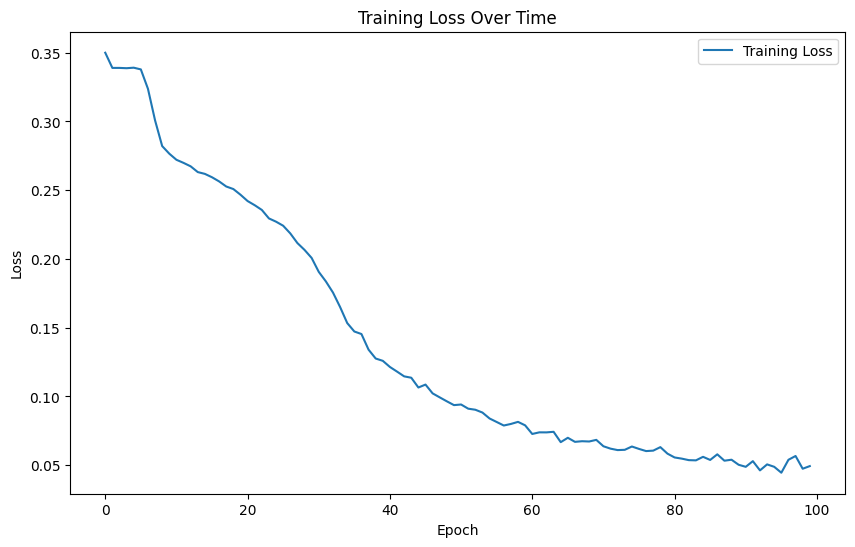

In [23]:
# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()


In [25]:
# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicted = torch.argmax(outputs, 1)
        total += targets.size(0)
        correct += (predicted == torch.argmax(targets, 1)).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 91.07464190599582%
